In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress

import PythonGraphMod

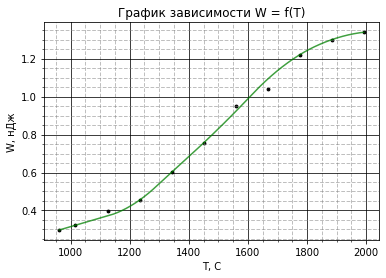

In [3]:
# Полцчаем файловый дескриптор файла с данными
fd = pd.read_excel("../data/data.ods")

I = np.array(fd['I']) # ток мкА
U = np.array(fd['U']) # напряжение мВ
T = np.array(fd['T']) # температура C
W = np.array(fd['W']) # мощност W = IU нВт

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

ax1.scatter(T, W, color='black', marker='o', s=8, alpha=1)

T = np.delete(T, [2, 6, -4])
W = np.delete(W, [2, 6, -4])

T_dence, W_dence = PythonGraphMod.InterpolateSet(T, W, 'quadratic', T[0], T[-1])

ax1.plot(T_dence, W_dence, color='green', alpha=0.75, lw=1.5, ls='-')

# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.title('График зависимости W = f(T)')
plt.ylabel('W, нДж')
plt.xlabel('T, C')

fig1.savefig("../images/W.pdf")

-23.148469406461704


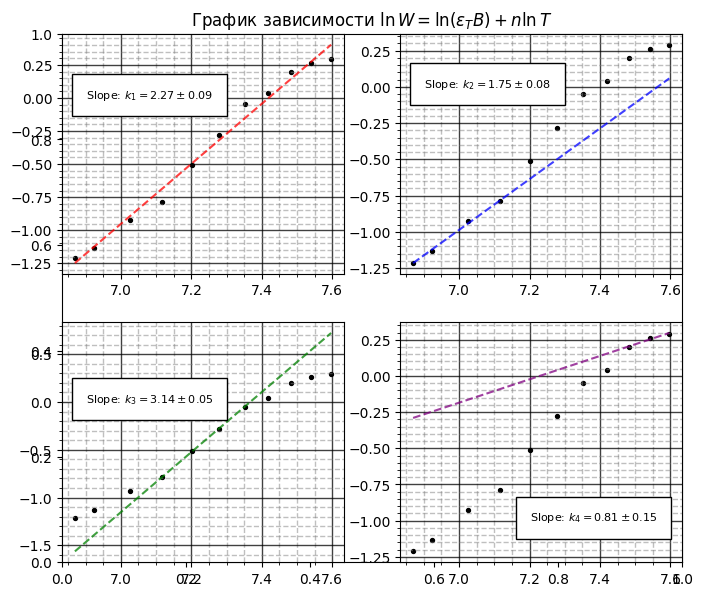

In [4]:
I = np.array(fd['I']) # ток мкА
U = np.array(fd['U']) # напряжение мВ
T = np.array(fd['T']) # температура C
W = np.array(fd['W']) # мощност W = IU нВт

figure = plt.figure(figsize=(8,7), dpi=100)
plt.title(r'График зависимости $\ln W = \ln (\varepsilon_T B) + n \ln T$')

axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure.add_subplot(2, 2, 3)
axes4 = figure.add_subplot(2, 2, 4)

axes1.scatter(np.log(T), np.log(W), color='black', marker='o', s=8, alpha=1)
axes2.scatter(np.log(T), np.log(W), color='black', marker='o', s=8, alpha=1)
axes3.scatter(np.log(T), np.log(W), color='black', marker='o', s=8, alpha=1)
axes4.scatter(np.log(T), np.log(W), color='black', marker='o', s=8, alpha=1)

lin0 = linregress(np.log(T), np.log(W))
lin1 = linregress(np.log(T[0:4]), np.log(W[0:4]))
lin2 = linregress(np.log(T[3:7]), np.log(W[3:7]))
lin3 = linregress(np.log(T[8:11]), np.log(W[8:11]))


axes1.plot(np.log(T), lin0.intercept + lin0.slope * np.log(T), color='red', alpha=0.75, lw=1.5, ls='--')
axes2.plot(np.log(T), lin1.intercept + lin1.slope * np.log(T), color='blue', alpha=0.75, lw=1.5, ls='--')
axes3.plot(np.log(T), lin2.intercept + lin2.slope * np.log(T), color='green', alpha=0.75, lw=1.5, ls='--')
axes4.plot(np.log(T), lin3.intercept + lin3.slope * np.log(T), color='purple', alpha=0.75, lw=1.5, ls='--')

print(lin2.intercept)

# сетка
axes1.minorticks_on()
axes1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
axes1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

axes2.minorticks_on()
axes2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
axes2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

axes3.minorticks_on()
axes3.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
axes3.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

axes4.minorticks_on()
axes4.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
axes4.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
axes1.text(6.9, 0, r'Slope: $k_1 = %0.2lf \pm %0.2lf$' %(lin0.slope, lin0.stderr),
           size = 8,
           bbox=dict(facecolor='white', edgecolor='black', pad=10.0))
axes2.text(6.9, 0, r'Slope: $k_2 = %0.2lf \pm %0.2lf$' %(lin1.slope, lin1.stderr),
           size = 8,
           bbox=dict(facecolor='white', edgecolor='black', pad=10.0))
axes3.text(6.9, 0, r'Slope: $k_3 = %0.2lf \pm %0.2lf$' %(lin2.slope, lin2.stderr),
           size = 8,
           bbox=dict(facecolor='white', edgecolor='black', pad=10.0))
axes4.text(7.2, -1, r'Slope: $k_4 = %0.2lf \pm %0.2lf$' %(lin3.slope, lin3.stderr),
           size = 8,
           bbox=dict(facecolor='white', edgecolor='black', pad=10.0))

figure.savefig("../images/logW.pdf")